### Задание 1

Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt

%matplotlib inline

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
#функция преобразования формата даты
def date (x):
    return(pd.to_datetime(x, unit='s'))

In [3]:
#построение групп когорт
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

In [4]:
#функция retention
def retention (a):
    a = a.groupby(['reg_ts', 'auth_ts']).agg({'uid':pd.Series.nunique}).rename(columns={'uid':'TotalUsers'}).sort_values(by= ['reg_ts', 'auth_ts'])
    a = a.groupby(level=0).apply(cohort_period)
    # reindex the DataFrame
    a.reset_index(inplace=True)
    a.set_index([ 'reg_ts', 'CohortPeriod'], inplace=True)

    # create a Series holding the total size of each CohortGroup
    cohort_group_size = a['TotalUsers'].groupby(level=0).first()
    user_retention = a['TotalUsers'].unstack(1).divide(cohort_group_size, axis=0).mul(100)
    return(user_retention)

In [27]:
#функция для отрисовки графика retention
def graph(a, d):
    a = a.groupby(['reg_ts', 'auth_ts']).agg({'uid':pd.Series.nunique}).rename(columns={'uid':'TotalUsers'}).sort_values(by= ['reg_ts', 'auth_ts'])
    a = a.groupby(level=0).apply(cohort_period)
    # reindex the DataFrame
    a.reset_index(inplace=True)
    a.set_index([ 'reg_ts', 'CohortPeriod'], inplace=True)

    # create a Series holding the total size of each CohortGroup
    cohort_group_size = a['TotalUsers'].groupby(level=0).first()
    user_retention = a['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1).mul(100)
    
    fig = user_retention[d].plot(figsize=(20,10))
    plt.title('Cohorts: User Retention')
    plt.xticks(np.arange(1, 12.1, 1)) # разбивка оси X
    plt.xlim(1, 12) #ось X
    plt.ylabel('% of Cohort Purchasing')
    return(fig)

In [5]:
#данныe о регистрации
reg_data = pd.read_csv('C:/Users/Маргарита/Karpov_projects/problem1-reg_data.csv', sep=';')
reg_data = reg_data.loc[0:500000] #ограничение набора данных, данную строку можно убрать для обработки полного набора датасета

# данные о времени захода пользователя в игру
auth_data = pd.read_csv('C:/Users/Маргарита/Karpov_projects/problem1-auth_data.csv', sep=';')
auth_data = auth_data.loc[0:1000000] #ограничение набора данных, данную строку можно убрать для обработки полного набора датасета

reg_data['reg_ts'] = date(reg_data['reg_ts'])
auth_data['auth_ts'] = date(auth_data['auth_ts'])

full_data = auth_data.merge(reg_data, how='outer', on='uid')
full_data.head()

,auth_ts,uid,reg_ts
0,1998-11-18 09:43:43,1,1998-11-18 09:43:43
1,1999-07-22 22:38:09,2,1999-07-22 22:38:09
2,1999-07-25 16:46:46,2,1999-07-22 22:38:09
3,1999-07-31 03:50:15,2,1999-07-22 22:38:09
4,1999-08-05 17:49:39,2,1999-07-22 22:38:09


In [6]:
#приведем дату к удобному формату
full_data['reg_ts'] = full_data['reg_ts'].dt.strftime('%Y-%m-%d')
full_data['auth_ts'] = full_data['auth_ts'].dt.strftime('%Y-%m-%d')

full_data['reg_ts'] = pd.to_datetime(full_data['reg_ts'], format='%Y-%m-%d')
full_data['auth_ts'] = pd.to_datetime(full_data['auth_ts'], format='%Y-%m-%d')
full_data.head()

,auth_ts,uid,reg_ts
0,1998-11-18,1,1998-11-18
1,1999-07-22,2,1999-07-22
2,1999-07-25,2,1999-07-22
3,1999-07-31,2,1999-07-22
4,1999-08-05,2,1999-07-22


In [7]:
retention_table = retention(full_data)
retention_table.head()

CohortPeriod,1,2,3,4,5,6,7,8,9,10,...,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597
reg_ts,,,,,,,,,,,,,,,,,,,,,
1998-11-18,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-07-22,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2000-01-13,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-28,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-16,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#для ориентации по имеющимся датам 
print('Минимальная дата: {} - Максимальная дата: {}'.format(retention_table.index.min(), retention_table.index.max()))
retention_table.index.tolist()

Минимальная дата: 1998-11-18 00:00:00 - Максимальная дата: 2016-12-29 00:00:00


[Timestamp('1998-11-18 00:00:00'),
 Timestamp('1999-07-22 00:00:00'),
 Timestamp('2000-01-13 00:00:00'),
 Timestamp('2000-05-28 00:00:00'),
 Timestamp('2000-09-16 00:00:00'),
 Timestamp('2000-12-19 00:00:00'),
 Timestamp('2001-03-10 00:00:00'),
 Timestamp('2001-05-21 00:00:00'),
 Timestamp('2001-07-24 00:00:00'),
 Timestamp('2001-09-20 00:00:00'),
 Timestamp('2001-11-12 00:00:00'),
 Timestamp('2001-12-30 00:00:00'),
 Timestamp('2002-02-13 00:00:00'),
 Timestamp('2002-03-27 00:00:00'),
 Timestamp('2002-05-05 00:00:00'),
 Timestamp('2002-06-11 00:00:00'),
 Timestamp('2002-07-16 00:00:00'),
 Timestamp('2002-08-18 00:00:00'),
 Timestamp('2002-09-18 00:00:00'),
 Timestamp('2002-10-18 00:00:00'),
 Timestamp('2002-11-15 00:00:00'),
 Timestamp('2002-12-12 00:00:00'),
 Timestamp('2003-01-07 00:00:00'),
 Timestamp('2003-02-01 00:00:00'),
 Timestamp('2003-02-25 00:00:00'),
 Timestamp('2003-03-20 00:00:00'),
 Timestamp('2003-04-11 00:00:00'),
 Timestamp('2003-05-02 00:00:00'),
 Timestamp('2003-05-

In [29]:
#вывод retention для определенных когорт пользователей
retention_table.loc[['2016-12-20', '2016-12-21']]

CohortPeriod,1,2,3,4,5,6,7,8,9,10,...,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597
reg_ts,,,,,,,,,,,,,,,,,,,,,
2016-12-20,100.0,1.744186,4.069767,6.395349,6.976744,9.883721,7.558140,2.325581,4.069767,4.069767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-21,100.0,1.734104,6.936416,5.202312,5.780347,6.936416,6.358382,9.826590,5.780347,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Введите необходимые даты через пробел в формате YYYY-MM-DD
2016-12-20 2016-12-21


<AxesSubplot:title={'center':'Cohorts: User Retention'}, xlabel='CohortPeriod', ylabel='% of Cohort Purchasing'>

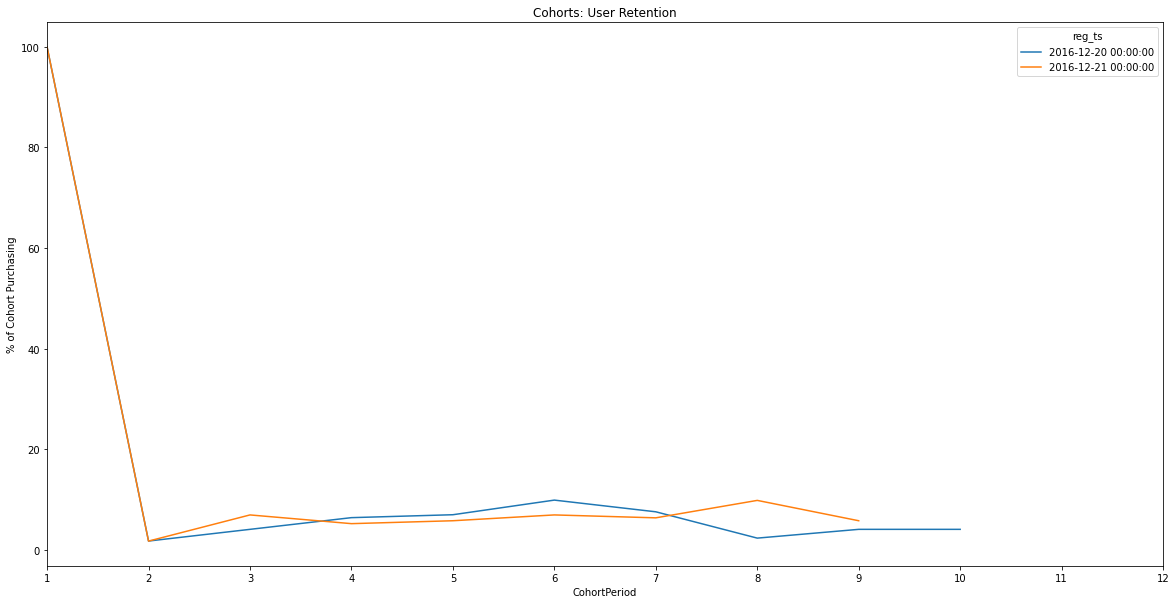

In [28]:
#2016-12-20 2016-12-21
b = []
print('Введите необходимые даты через пробел в формате YYYY-MM-DD')
b = input("")
b = b.split()
graph(full_data, b)